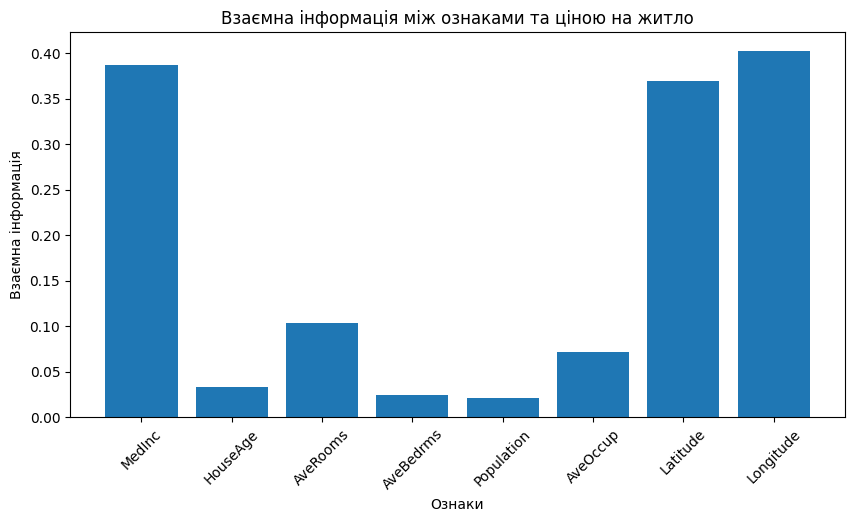

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import mutual_info_regression

# Завантаження реальних даних (ціни на житло в Каліфорнії)
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

# Обчислення взаємної інформації
mi_scores = mutual_info_regression(df.drop(columns=['target']), df['target'])

# Візуалізація
plt.figure(figsize=(10, 5))
plt.bar(df.drop(columns=['target']).columns, mi_scores)
plt.xticks(rotation=45)
plt.xlabel('Ознаки')
plt.ylabel('Взаємна інформація')
plt.title('Взаємна інформація між ознаками та ціною на житло')
plt.show()

In [3]:
mi_scores

array([0.38748592, 0.03323728, 0.1031554 , 0.02390378, 0.02110608,
       0.07215342, 0.36987504, 0.40314011])

Як працює mutual_info_regression і що він дає?

1. Взаємна інформація (Mutual Information, MI) – це міра, яка показує, скільки інформації про цільову змінну можна отримати з певної ознаки. Вона ґрунтується на теорії інформації та використовується для виявлення нелінійних залежностей між змінними.

2. mutual_info_regression з бібліотеки sklearn.feature_selection оцінює зв’язок між кожною ознакою та цільовою змінною. 

3. На відміну від кореляції, яка виявляє лише лінійні зв’язки, взаємна інформація здатна виявляти навіть складні та нелінійні залежності.

Як розраховується MI:
- MI оцінює, наскільки знання однієї змінної (наприклад, середнього доходу) зменшує невизначеність щодо іншої (ціни на житло).
- Використовується метод наближення ентропії за допомогою квантування (розбиття даних на бінs).
- Високе значення MI означає сильний вплив ознаки на цільову змінну.
- Низьке значення MI означає слабкий або відсутній зв’язок.
- MI не показує напрямок зв’язку (на відміну від кореляції), а лише його силу.

Як інтерпретувати результати:
- Якщо значення MI високе → ця ознака суттєво впливає на цільову змінну.
- Якщо MI ≈ 0 → ознака майже не містить інформації, корисної для прогнозування цільової змінної.

У цьому коді ми аналізуємо набір даних про ціни на житло в Каліфорнії. MI допомагає визначити, які фактори найбільше впливають на вартість житла, навіть якщо зв’язок між ними складний і нелінійний. Графік покаже, які ознаки є найважливішими для прогнозування ціни.